In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

exams = pd.read_csv('exams.csv')

In [119]:
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [120]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [121]:
X = exams['math score'].values.reshape(-1, 1)
y = exams['reading score'].values.reshape(-1, 1)


In [122]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [123]:
print('Pendiente: ', model.coef_)
print('Intercepto: ', model.intercept_)


Pendiente:  [[0.75093681]]
Intercepto:  [19.4609748]


In [124]:
x_pred = np.array([[75]])
y_pred = model.predict(x_pred)
print('Predicción: ', y_pred)


Predicción:  [[75.78123568]]


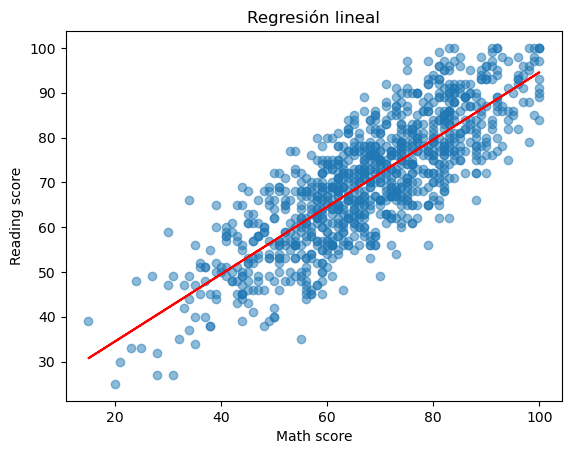

In [125]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión lineal')
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.show()


In [126]:
X = exams[['math score', 'reading score']]
y = exams['writing score']


In [127]:
print(X)

     math score  reading score
0            59             70
1            96             93
2            57             76
3            70             70
4            83             85
..          ...            ...
995          77             77
996          80             66
997          67             86
998          80             72
999          58             47

[1000 rows x 2 columns]


In [128]:
print(y)

0      78
1      87
2      77
3      63
4      86
       ..
995    71
996    66
997    86
998    62
999    45
Name: writing score, Length: 1000, dtype: int64


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
y_pred = model.predict(X_test)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          23       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         4
          47       0.00      0.00      0.00         4
          48       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          51       0.00      0.00      0.00         3
          52       0.00    

/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
model = DecisionTreeClassifier()

In [135]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
y_pred = model.predict(X_test)


In [137]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]]
              precision    recall  f1-score   support

          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       1.00      0.50      0.67         2
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         1
          50   

/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omar/.conda/envs/data_analisis/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res